In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm 
import numpy as np

Ticker_list = ['MSFT', 'AAPL', 'TSLA', 'AMZN', 'BABA']
Stocks = yf.download(tickers = Ticker_list, start="2020-01-01", end="2023-01-01")
Stocks.tail()

[*********************100%***********************]  5 of 5 completed


Adj Close                                                \
                  AAPL       AMZN       BABA        MSFT        TSLA   
Date                                                                   
2022-12-23  131.477127  85.250000  85.650002  238.133545  123.150002   
2022-12-27  129.652435  83.040001  89.860001  236.367981  109.099998   
2022-12-28  125.674019  81.820000  87.199997  233.944031  112.709999   
2022-12-29  129.233658  84.180000  89.129997  240.407837  121.820000   
2022-12-30  129.552719  84.000000  88.089996  239.220825  123.180000   

                 Close                                                ...  \
                  AAPL       AMZN       BABA        MSFT        TSLA  ...   
Date                                                                  ...   
2022-12-23  131.860001  85.250000  85.650002  238.729996  123.150002  ...   
2022-12-27  130.029999  83.040001  89.860001  236.960007  109.099998  ...   
2022-12-28  126.040001  81.820000  87.199997  234.529999  112.709999  ...   
2022-12-29  129.610001  84.180000  89.129997  241.009995  121.820000  ...   
2022-12-30  129.929993  84.000000  88.089996  239.820007  123.180000  ...   

                  Open                                                \
                  AAPL       AMZN       BABA        MSFT        TSLA   
Date                                                                   
2022-12-23  130.919998  83.250000  87.849998  236.110001  126.370003   
2022-12-27  131.380005  84.970001  86.550003  238.699997  117.500000   
2022-12-28  129.669998  82.800003  88.980003  236.889999  110.349998   
2022-12-29  127.989998  82.870003  87.625000  235.649994  120.389999   
2022-12-30  128.410004  83.120003  87.449997  238.210007  119.949997   

              Volume                                           
                AAPL      AMZN      BABA      MSFT       TSLA  
Date                                                           
2022-12-23  63814900  57433700  17949300  21207000  166989700  
2022-12-27  69007800  57284000  22959900  16688600  208643400  
2022-12-28  85438400  58228600  16268800  17457100  221070500  
2022-12-29  75703700  54995900  12535400  19770700  221923300  
2022-12-30  77034200  62401200  11926700  21938500  157777300  

[5 rows x 30 columns]

In [31]:
Stocks = Stocks['Close']
Stocks.tail()

,AAPL,AMZN,BABA,MSFT,TSLA
Date,,,,,
2022-12-23,131.860001,85.250000,85.650002,238.729996,123.150002
2022-12-27,130.029999,83.040001,89.860001,236.960007,109.099998
2022-12-28,126.040001,81.820000,87.199997,234.529999,112.709999
2022-12-29,129.610001,84.180000,89.129997,241.009995,121.820000
2022-12-30,129.929993,84.000000,88.089996,239.820007,123.180000


In [32]:
Stocks.cov()

,AAPL,AMZN,BABA,MSFT,TSLA
AAPL,934.310654,352.725737,-1219.970230,1325.903532,2722.113055
AMZN,352.725737,775.957789,748.941526,717.459199,1346.724696
BABA,-1219.970230,748.941526,4730.935888,-1641.984422,-3166.332558
MSFT,1325.903532,717.459199,-1641.984422,2264.071906,4123.124615
TSLA,2722.113055,1346.724696,-3166.332558,4123.124615,9188.559681


In [33]:
Stocks.corr()

,AAPL,AMZN,BABA,MSFT,TSLA
AAPL,1.000000,0.414259,-0.580270,0.911635,0.929045
AMZN,0.414259,1.000000,0.390891,0.541294,0.504355
BABA,-0.580270,0.390891,1.000000,-0.501707,-0.480241
MSFT,0.911635,0.541294,-0.501707,1.000000,0.903978
TSLA,0.929045,0.504355,-0.480241,0.903978,1.000000


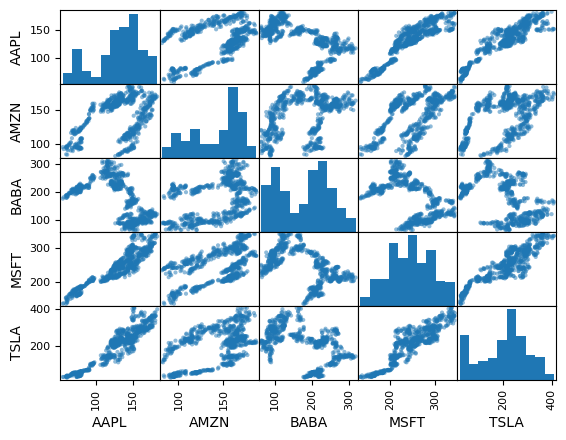

In [36]:
from pandas.plotting import scatter_matrix
sm = scatter_matrix(Stocks) 

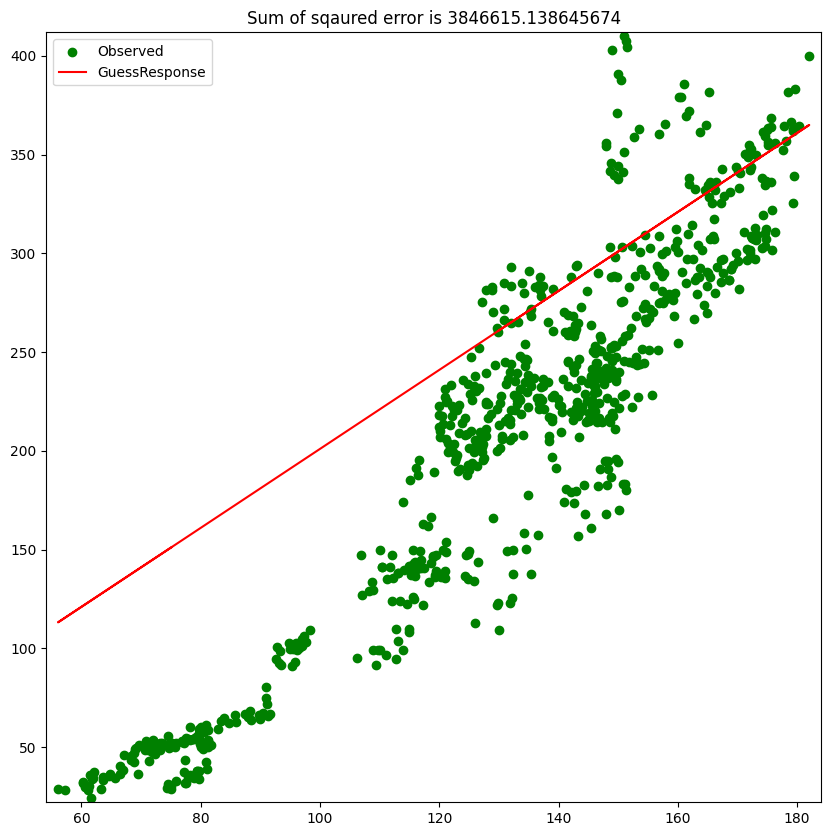

In [41]:
b0 = 1
b1 = 2
Stocks['GuessResponse'] = b0 + b1*Stocks['AAPL']

Stocks['observederror'] = Stocks['TSLA'] - Stocks['GuessResponse']

plt.figure(figsize=(10, 10))
plt.title('Sum of sqaured error is {}'.format((((Stocks['observederror'])**2)).sum()))

plt.scatter(Stocks['AAPL'], Stocks['TSLA'], color='g', label='Observed')
plt.plot(Stocks['AAPL'], Stocks['GuessResponse'], color='red', label='GuessResponse')
plt.legend()
plt.xlim(Stocks['AAPL'].min()-2, Stocks['AAPL'].max()+2)
plt.ylim(Stocks['TSLA'].min()-2, Stocks['TSLA'].max()+2)
plt.show()

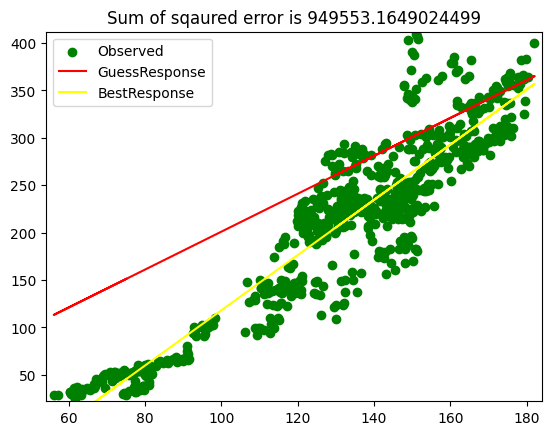

In [45]:
import statsmodels.formula.api as smf

formula = 'TSLA ~ AAPL'
model = smf.ols(formula=formula, data=Stocks).fit()

b0_ols = model.params[0]
b1_ols = model.params[1]

Stocks['BestResponse'] = b0_ols + b1_ols*Stocks['AAPL']

Stocks['error'] = Stocks['TSLA'] - Stocks['BestResponse']


plt.title('Sum of sqaured error is {}'.format((((Stocks['error'])**2)).sum()))
plt.scatter(Stocks['AAPL'], Stocks['TSLA'], color='g', label='Observed')
plt.plot(Stocks['AAPL'], Stocks['GuessResponse'], color='red', label='GuessResponse')
plt.plot(Stocks['AAPL'], Stocks['BestResponse'], color='yellow', label='BestResponse')
plt.legend()
plt.xlim(Stocks['AAPL'].min()-2, Stocks['AAPL'].max()+2)
plt.ylim(Stocks['TSLA'].min()-2, Stocks['TSLA'].max()+2)
plt.show()

In [46]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   TSLA   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     4755.
Date:                Sat, 20 May 2023   Prob (F-statistic):               0.00
Time:                        00:24:10   Log-Likelihood:                -3770.0
No. Observations:                 756   AIC:                             7544.
Df Residuals:                     754   BIC:                             7553.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -173.2978      5.655    -30.644      0.000    -184.400    -162.196
AAPL           2.9135      0.042     68.954      0.000       2.831       2.996
==============================================================================
Omnibus:                       56.719   Durbin-Watson:                   0.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.478
Skew:                           0.495   Prob(JB):                     1.25e-23
Kurtosis:                       4.539   Cond. No.                         586.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""